<a href="https://colab.research.google.com/github/tareq056/Machine-learning-/blob/main/190104056_AI_term_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
dataset_random_forest=pd.read_csv("/content/drive/MyDrive/AI Term 3/DATASET/BostonHousing.csv")
dataset_linear_regresion = pd.read_csv('/content/drive/MyDrive/AI Term 3/DATASET/BostonHousing.csv')

In [ ]:
dataset_random_forest.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
dataset_linear_regresion.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
X_random = dataset_random_forest.iloc[:,0:11].values

Y_random = dataset_random_forest.iloc[:,11].values

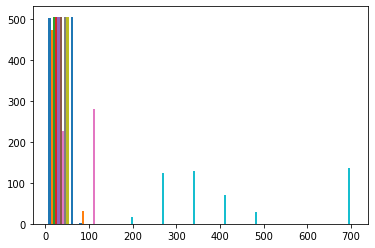

In [ ]:
plt.hist(X_random)
plt.show() 

In [ ]:
dataset_random_forest.iloc[:,11]

0      396.90
1      396.90
2      392.83
3      394.63
4      396.90
        ...  
501    391.99
502    396.90
503    396.90
504    393.45
505    396.90
Name: b, Length: 506, dtype: float64

In [ ]:
X_train_random,X_test_random,Y_train_random,Y_test_random = train_test_split(X_random,Y_random,test_size=0.2,random_state=0)

In [ ]:
sc = StandardScaler();
X_train_random = sc.fit_transform(X_train_random)
X_test_random = sc.fit_transform(X_test_random)

StandardScaler()

In [ ]:
k = 10
cv = KFold(n_splits=k,shuffle=True,random_state=1)
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(X_train_random,Y_train_random)
scores = cross_val_score(regressor, X_train_random, Y_train_random, cv=cv)
y_pred_random = regressor.predict(X_test_random)


In [ ]:
print("MSE",mean_squared_error(Y_test_random,y_pred_random))
print("RMSE",mean_squared_error(Y_test_random,y_pred_random,squared=False))
print("MAE",mean_absolute_error(Y_test_random,y_pred_random))
print("R2_SCORE :",r2_score(Y_test_random,y_pred_random))


mse11 = mean_squared_error(Y_test_random,y_pred_random)
rmse11 = mean_squared_error(Y_test_random,y_pred_random,squared=False)
mae11 = mean_absolute_error(Y_test_random,y_pred_random)
r2_score = r2_score(Y_test_random,y_pred_random)

MSE 6357.90688234059
RMSE 79.73648401039884
MAE 41.259701960784284
R2_SCORE : 0.37163237576241326


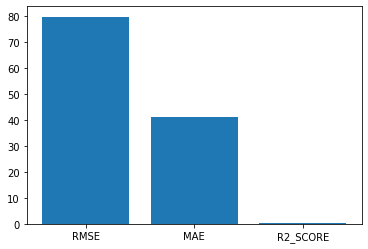

In [ ]:
v1 = ["RMSE","MAE","R2_SCORE"]
v2 = [rmse11,mae11,r2_score]
plt.bar(v1,v2)
plt.show()

In [ ]:
X_linear = dataset_random_forest.iloc[:,0:11].values

Y_linear = dataset_random_forest.iloc[:,11].values

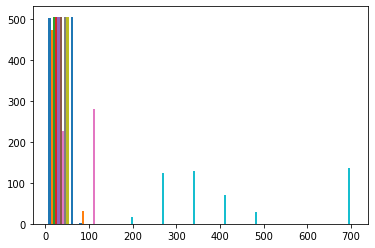

In [ ]:
plt.hist(X_linear)
plt.show() 

In [ ]:
X_train_linear,X_test_linear,Y_train_linear,Y_test_linear = train_test_split(X_linear,Y_linear,test_size=0.2,random_state=0)

In [ ]:
sc = StandardScaler();
X_train_linear = sc.fit_transform(X_train_linear)
X_test_linear = sc.fit_transform(X_test_linear)

In [ ]:
k = 10
cv = KFold(n_splits=k,shuffle=True,random_state=1)
linear = LinearRegression()
linear.fit(X_train_linear,Y_train_linear)
scores = cross_val_score(linear, X_train_linear, Y_train_linear, cv=cv)
y_pred_linear = linear.predict(X_test_linear)


In [ ]:
print("MSE",mean_squared_error(Y_test_linear,y_pred_linear))
print("RMSE",mean_squared_error(Y_test_linear,y_pred_linear,squared=False))
print("MAE",mean_absolute_error(Y_test_linear,y_pred_linear))


mse1 = mean_squared_error(Y_test_linear,y_pred_linear)
rmse1 = mean_squared_error(Y_test_linear,y_pred_linear,squared=False)
mae1 = mean_absolute_error(Y_test_linear,y_pred_linear)


MSE 7895.8771859021645
RMSE 88.85874850515376
MAE 48.804147500817535


<function matplotlib.pyplot.show(*args, **kw)>

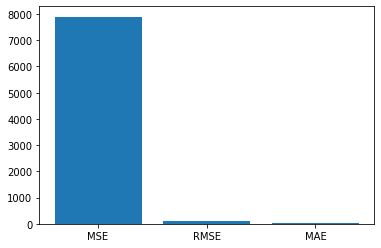

In [ ]:
v1 = ["MSE","RMSE","MAE"]
v2 = [mse1,rmse1,mae1]
plt.bar(v1,v2)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

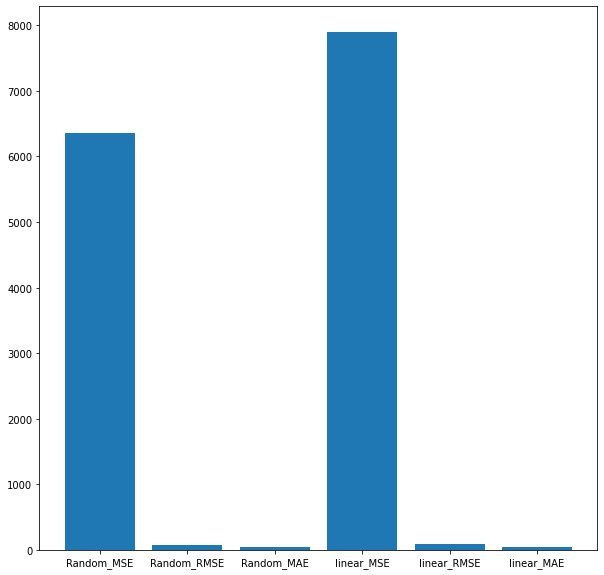

In [ ]:
v1 = ["Random_MSE","Random_RMSE","Random_MAE","linear_MSE","linear_RMSE","linear_MAE"]
v2 = [mse11,rmse11,mae11,mse1,rmse1,mae1]
plt.figure(figsize=(10,10))
plt.bar(v1,v2)
plt.show